<h2>Лабораторна робота №2</h2>
<h3>студентки групи МІТ-31</h3>
<h3><b>Агафонової Мирослави</h3>

Створити набір даних за допомогою DatasetGenerator

Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

(опціонально для отримання відмінної оцінки) Згенерувати набір даних для регресії на основі звичайних можливостей Python.

Для отриманих наборів даних провести встановленні кроки моделювання.

Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab2.

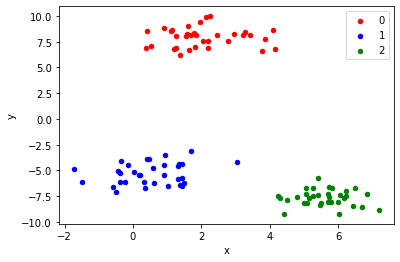

In [66]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

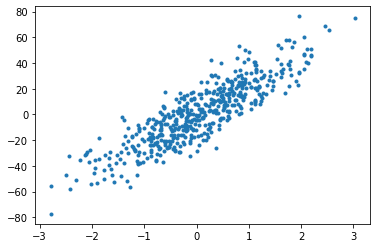

In [110]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
x, y, coef = datasets.make_regression(n_samples=500,#number of samples
                                      n_features=1,#number of features
                                      n_informative=80,#number of useful features 
                                      noise=12,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=1) #set for same data points for each run

plt.ion() #interactive plot on
plt.plot(x,y,'.',label='training data')

df = pd.DataFrame(data={'X':x.flatten(),'Y':y,'coef':coef})
df.to_csv('./datasetsGenerator.csv', index=None)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle


# load the dataset into memory
salary = pd.read_csv('Salary_Data.csv')
#the overall shape of the data set
salary.shape

(30, 2)

In [68]:
salary.head()#will print out the top 5

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [69]:
salary.head(11)#will print out the top 11

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [70]:
salary.tail(11)#will print out the bottom 11

,YearsExperience,Salary
19,6.0,93940.0
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0


In [71]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [112]:
corr = salary.corr()

<AxesSubplot:>

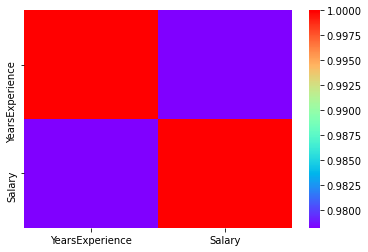

In [113]:
sns.heatmap(corr, cmap="rainbow")

<AxesSubplot:xlabel='YearsExperience'>

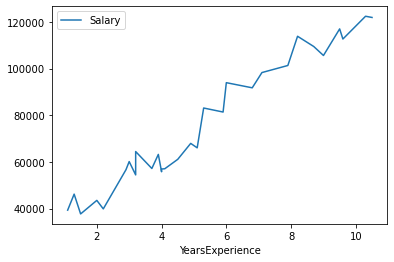

In [108]:
salary.plot("YearsExperience", "Salary")#try and plot the data

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

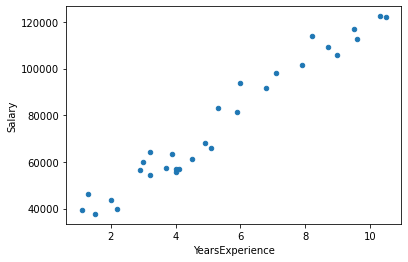

In [78]:
salary.plot.scatter("YearsExperience", "Salary")#a scatter plot without individual lines

In [80]:
x_train, x_test, y_train, y_test = train_test_split(salary.YearsExperience, salary.Salary, test_size = 0.2)#he primary function is to split up the data as “train” and “test.”

In [81]:
regr = LinearRegression()#impose a linear regression

In [82]:
regr.fit(np.array(x_train).reshape(-1,1), y_train)#This will call LinearRegression(), and then allow us to use our own data to predict.

LinearRegression()

In [83]:
preds = regr.predict(np.array(x_test).reshape(-1,1))#to pass in the data to give predictions.

In [84]:
y_test.head()

1      46205.0
15     67938.0
7      54445.0
29    121872.0
18     81363.0
Name: Salary, dtype: float64

In [85]:
preds

array([ 37665.12385628,  72354.8786764 ,  55973.60556689, 126316.71950769,
        81990.92168198,  64646.04427192])

In [86]:
residuals = preds - y_test

(array([1., 0., 0., 0., 0., 1., 1., 0., 2., 1.]),
 array([-8539.87614372, -6929.38410216, -5318.89206059, -3708.40001903,
        -2097.90797746,  -487.4159359 ,  1123.07610567,  2733.56814723,
         4344.0601888 ,  5954.55223036,  7565.04427192]),
 <BarContainer object of 10 artists>)

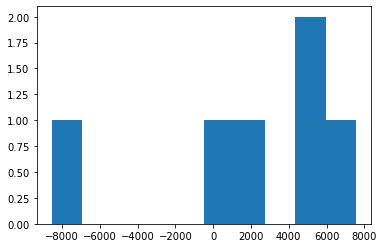

In [87]:
plt.hist(residuals)

In [89]:
mean_squared_error(y_test, preds) ** 0.5#root mean squared error to find the error

5356.532596562553